# ***Modeling Firm-Level Loss Behaviour and Corporate Income Tax (CIT) Revenue Risk in Kenya***

### Presented by Group 9
### Team Members:

 1. Brian Kahiu

 2. John Karanja

 3. Cyrus Mutuku

 4. Catherine Gachiri

 5. Fredrick Nzeve

 6. Grace Kinyanjui

 7. Jeremy Onsongo

### Business Problem

Kenya Revenue Authority (KRA) experiences persistent Corporate Income Tax (CIT) revenue leakage as firms report losses despite ongoing business activity, limiting effective audit targeting and fiscal planning.

### Approach
Using 300,000+ firm-year CIT returns, financial ratios were engineered from accounting data and machine learning models applied to identify high-risk loss-reporting firms. Prior to modelling, the data were subjected to a structured pre-processing pipeline to ensure data integrity, eliminate duplication, prevent information leakage, stabilise engineered features, and guarantee reproducibility across training and test samples. After all preprocessing and feature engineering steps, the final modelling dataset contains 99,332 firms, split into 74,499 training observations and 24,833 test observations, with 289 features used in estimation. The observed loss rate in the test sample is 36 per cent.

### Key Results
A tuned XGBoost model achieved ***78.8%*** ROC-AUC with 57.3% precision in loss detection, improving performance by 21.6% over baseline and identifying cost-to-turnover ratio as the strongest predictor.

### Business Impact
The model enables:

i. 40% improvement in audit efficiency
ii. KSh 50M+ annual revenue recovery potential
iii. Shift from reactive to predictive compliance

### Recommendation
KRA should integrate the model into audit selection workflows to prioritize high-risk firms, supported by SHAP-based explanations for transparency and operational trust.

### 1.0 Business Understanding
### Background Information
The Kenya Revenue Authority was established by an Act of Parliament, Chapter 469 of the laws of Kenya, which became effective on 1st July 1995. KRA is charged with collecting revenue on behalf of the government of Kenya. The core functions of the Authority are: -

• To assess, collect and account for all revenues in accordance with the written laws and the specified provisions of the written laws.

• To advise on matters relating to the administration of, and collection of revenue under the written laws or the specified provisions of the written laws.

• To perform such other functions in relation to revenue as the Minister may direct.

Income Tax (CIT) in Kenya is regulated by the Kenya Revenue Authority under the Income Tax Act (Cap 470), with a standard rate of 30% for resident companies and 37.5% for non-residents, though some sectors get incentives (like SEZs/EPZs). Key regulations involve online filing via iTax, payment of installments (quarterly), and specific rules for PEs, with compliance now heavily reliant on valid eTIMS invoices.

A corporate is considered resident in Kenya if it is incorporated under Kenyan Law or if the management and control of its affairs are exercised in Kenya for any given year of income. It is also considered resident if the Cabinet Secretary, National Treasury & Planning declares the company to be tax resident, for a particular year of income in a notice published in the Kenya Gazette.

At the end of the accounting period, Companies are required to have their books of accounts audited before filing their annual return within six months after the end of their accounting period. The Company tax return, popularly known as ITC2, is available on iTax platform under the returns menu, the ‘file return option.

The taxable income as declared in the corporation tax return is arrived at by declaring the gross income earned during the year and deducting expenses that have been wholly and exclusively incurred in the production of the income as guided by the income Tax Act (Cap 470).

### Business Problem Definition

Kenya has persistently failed to meet Corporate Income Tax (CIT) revenue targets. The high prevalence of firms reporting losses significantly erodes the effective tax base, creating fiscal uncertainty. The central problem is the lack of an empirical, data-driven framework for:

1. Identifying which firm-level characteristics are associated with loss reporting.
2. Proactively identifying high-risk firms and sectors.
3. Assessing how firm-level loss behavior translates into systemic CIT revenue risk.

### Our Solution

An automated risk scoring system that:

1. Processes firm-level CIT return data using the methodology outlined in the project proposal.
2. Employs an iterative modeling approach, beginning with interpretable logistic regression as a primary benchmark.
3. Applies machine learning to identify high-risk loss-reporting firms for targeted compliance.

### Project Objectives
***Main Objective***
To develop a supervised predictive model estimating the probability of a firm reporting a loss, as defined in the project proposal.

***Specific Objectives***

1. To empirically identify firm-level characteristics associated with loss reporting in CIT returns.
2. To develop a supervised predictive model estimating the probability of a firm reporting a loss.
3. To assess the concentration and distribution of loss behavior across sectors and firm groups.
4. To translate firm-level loss probabilities into insights on aggregate CIT revenue risk.

### Methodology: CRISP-DM Framework
This project follows the Cross-Industry Standard Process for Data Mining (CRISP-DM) to ensure a structured, transparent, and policy-relevant analytics workflow.

### Business Understanding
Stakeholder needs were identified, the business problem was defined, and success metrics were established to align analytical outputs with compliance and fiscal objectives.

### Data Understanding
Corporate Income Tax return data were explored to assess structure, data quality, and preliminary patterns in loss-reporting behavior across firms and sectors.

### Data Preparation
Raw accounting variables were transformed into financial ratios, with outlier treatment and feature creation applied to improve data quality and model stability.

### Modeling
A baseline Logistic Regression model was developed as an interpretable benchmark, followed by an optimized XGBoost model using systematic hyperparameter tuning.

### Evaluation
Model performance was assessed using ROC-AUC, precision, recall, and F1-score, alongside business impact analysis and SHAP-based explainability.

### Deployment
A high-level implementation roadmap was defined, including model packaging, integration into audit selection workflows, and monitoring considerations.

### Success Metrics
### Technical Metrics

Model performance assessed using AUC-ROC, precision, recall, and F1-score.
Validation follows a time-based split to reflect real-world forecasting conditions.

### Business Metrics

-Support risk-based compliance management for the Kenya Revenue Authority.
-Provide clearer understanding of structural weaknesses in the CIT base for the National Treasury.
-Inform policy discussions on capital allowances, financing structures, and related-party transactions.

### Primary Stakeholders

1. KRA Compliance Directors

***Problem:*** Manual audit selection misses high-risk loss-reporting firms

***Need:*** Prioritize firms with highest evasion probability for investigation

***Business Value:*** Improved audit efficiency and revenue recovery

2. Tax Policy Analysts at National Treasury

***Problem:*** Revenue forecasting uncertainty due to loss declaration patterns

***Need:*** Data-driven risk assessment for fiscal planning and budgeting

***Business Value:*** Improved accuracy in CIT revenue projections

3. Field Tax Officers

***Problem:***   Wasted time on low-risk audits with minimal revenue recovery

***Need:*** Focus investigations on firms with highest probability of tax avoidance

***Business Value:*** Higher productivity and improved targeting outcomes

### 2.0 Data Understanding

The analysis is based on raw year 2024 Corporate Income Tax (CIT) return data comprising 313,870 firm-year observations and 61 variables obtained from administrative tax filings. The dataset is predominantly numeric (47 numeric variables) with 14 categorical variables capturing sectoral classification and firm size.

We load the raw CIT return data. Our cleaning focus is on defining the Modelling Scope: Validity: We only keep firms with positive turnover (active businesses). Target Definition: A firm is flagged as "Risk" (is_loss = 1) if it reports a negative Profit Before Tax. Sector Standardization: We clean messy sector names and group rare sectors into "Other" to prevent the model from overfitting to tiny industries.


***Import the initial required libraries**

In [1]:
# ----------------------------
# Imports
# ----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Global seed (reproducibility)
# ----------------------------
SEED = 42
np.random.seed(SEED)

# ----------------------------
# Display settings
# ----------------------------
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 200)
pd.set_option("display.float_format", "{:,.4f}".format)


***loading data***
We loaded the data and observed that it has 313870 rows and  61 columns 

In [2]:
# ----------------------------
# Load raw data
# ----------------------------
DATA_PATH = "CIT2024.csv"


df = pd.read_csv(DATA_PATH, low_memory=False)

# ----------------------------
# Basic structural checks
# ----------------------------
print("Dataset shape:", df.shape)

print("\nFirst five rows:")
display(df.head(5))

print("\nData types summary:")
display(df.dtypes.value_counts())

print("\nDuplicate rows:", df.duplicated().sum())


Dataset shape: (313870, 61)

First five rows:


,unique_id,business_type,business_subtype,epz_effective_dt,period_from,period_to,filing_date,is_nil_return,return_type,assmt_type,eff_dt_com_activity,sector,division_,group_,class_,grossturnover,cost_of_sales,total_opening_stock,total_purchase_and_imports,odc_tot_of_other_direct_costs,odc_factory_rent_and_rates,fact_ovh_fuel_and_power,fact_ovh_indirect_wages,fact_ovh_consumables,fact_ovh_depreciation,other_factory_overheads,total_factory_overheads,total_closing_stock,gross_profit,total_other_income,total_other_income_int,oi_dividend,oi_commision,oi_natural_resource_payments,oi_royalties,oi_gift_in_conn_wth_prprty,oi_prof_of_disposal_of_assets,oi_realized_exchange_gain,oi_unrealized_exchange_gain,oi_prvsn_for_bad_doubtful_db,insurance_comp,tot_opexp,admexp_depreciation,admexp__loss_disposal_assets,admexp__scntfc_research_exp,admexp__mgmt_exp,total_administrative_exp,total_employment_exp,total_financing_exp,profit_loss_before_tax,income_tax_exp,prof_loss_tax_div_bal_st,empexp__salary_wages,init_plant_mach_allow,init_indu_buld_allow,cap_allw_indu_buld,wear_tear_dedc_rbm,wear_tear_dedc_slm,deduct_agri_land,tot_allow_deductions,avg_no_of_employees
0,"1,210,000,124.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,N,Original,S,NaN,SERVICE ACTIVITIES,951-Repair of computers and personal and house...,9521-Repair of consumer electronics,8411 - General public administration activities,"3,605,224.8800","2,350,913.8000",0.0000,"2,350,913.8000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"1,254,311.0800",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"842,870.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"8,191.0800",NaN,"8,191.0800",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN
1,"12,100,006,324.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/06/2025,Y,Original,S,NaN,SERVICE ACTIVITIES,961-personal service activities,9602-Hairdressing and other beauty treatment,9602 - Hairdressing and other beauty treatment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
2,"12,100,019,424.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,27/05/2025,N,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","461-Wholesale trade, except of motor vehicles ...",4614-Wholesale of other household goods,8110 - Combined facilities support activities,"67,712,664.5400","66,436,372.6700","107,900.0000","67,328,772.6700",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"1,000,300.0000","1,276,291.8700",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"525,700.0000","1,853.1000",0.0000,0.0000,0.0000,"251,853.1000","250,000.0000","74,854.6400","151,384.1300",NaN,"151,384.1300","250,000.0000",0.0000,0.0000,0.0000,"1,853.1000",0.0000,0.0000,"1,853.1000",NaN
3,"12,100,019,624.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,20/05/2025,Y,Original,S,NaN,"WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VE...","471-Retail trade, except of motor vehicles and...","4720-Retail sale of hardware, paints and glass...",8620 - Medical and dental practice activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"12,100,020,724.0000",Company,Private Company,NaN,1/1/2024,31/12/2024,29/06/2025,N,Original,S,NaN,"PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES",701-Activities of head offices; management con...,7020-Management consultancy activities,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"200,833.0000","202,523.0000","1,690.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"15,000.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"8,237.0000","114,704.0000",NaN,"114,704.0000",0.0


Data types summary:


float64    47
object     14
Name: count, dtype: int64


Duplicate rows: 3011


### 2. Initial Data Quality Checks

The raw dataset contains 313,870 observations and 61 variables, with a predominantly numeric structure: 47 variables are numeric (float64) and 14 are categorical (object). This composition is well-suited for ratio-based feature engineering and supervised modelling, with limited reliance on text-heavy fields.

A duplicate check identified 3,011 exact duplicate rows, which were removed to prevent artificial inflation of patterns during modelling. After deduplication, the dataset was reduced to 310,859 unique firm-year observations.

Missingness is concentrated in a small subset of variables, while the majority of fields exhibit high completeness. Basic sanity checks on key financial variables—turnover, total costs, and profit/loss before tax—indicate wide dispersion, consistent with firm heterogeneity, but no immediately implausible ranges that would warrant blanket exclusions at this stage.

A small number of variables imported as text were found to be predominantly numeric in nature and were safely coerced to numeric types to ensure consistency in subsequent feature engineering.

At this point, the dataset is structurally sound and ready for standardisation and domain-specific cleaning, beginning with sector harmonisation and alignment of core financial fields

In [3]:
# ============================================================
# 2) Initial Data Quality Checks (single clean cell)
#    - missingness (top 15)
#    - duplicates (count + drop)
#    - data types summary
#    - numeric sanity checks (turnover, costs, profit)
#    - coerce mostly-numeric object columns
# ============================================================

# --- A) Data types summary ---
dtype_summary = df.dtypes.value_counts()
print("\nData types summary:\n")
print(dtype_summary)

# --- B) Duplicate check + drop ---
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows identified: {dup_count:,}")

df = df.drop_duplicates().reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)

# --- C) Missingness (%), top 15 columns ---
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
missing_table = missing_pct.reset_index()
missing_table.columns = ["column", "missing_percent"]

print("\nTop 15 columns by missingness (%):")
display(missing_table.head(15))

# --- D) Coerce mixed-type columns (object -> numeric where mostly numeric) ---
coerced_cols = []
for col in df.columns:
    if df[col].dtype == "object":
        coerced = pd.to_numeric(df[col], errors="coerce")
        if coerced.notna().mean() > 0.90:  # heuristic: mostly numeric values
            df[col] = coerced
            coerced_cols.append(col)

print("\nColumns coerced to numeric (if any):")
print(coerced_cols if coerced_cols else "None")

# --- E) Numeric sanity checks (min/max/mean) for key financial fields ---
# Try common candidate names so the cell works even if your raw column names differ.
TURNOVER_CANDS = ["gross_business", "business_gross_turnover", "gross_turnover", "turnover", "sales", "total_sales"]
COST_CANDS     = ["total_costs", "total_cost", "total_expenses", "total_expenditure", "cost_of_sales"]
PROFIT_CANDS   = ["profit_loss_before_tax", "profit_before_tax", "profit_loss", "pbt", "taxable_profit"]

turnover_col = next((c for c in TURNOVER_CANDS if c in df.columns), None)
cost_col     = next((c for c in COST_CANDS if c in df.columns), None)
profit_col   = next((c for c in PROFIT_CANDS if c in df.columns), None)

key_cols = [c for c in [turnover_col, cost_col, profit_col] if c is not None]

print("\nSelected key columns for sanity checks:")
print({"turnover": turnover_col, "total_costs": cost_col, "profit": profit_col})

if key_cols:
    tmp = df[key_cols].apply(pd.to_numeric, errors="coerce")
    sanity = tmp.describe().T[["count", "min", "max", "mean"]]
    print("\nSanity check summary (count/min/max/mean):")
    display(sanity)
else:
    print("\nSanity checks skipped: could not find turnover/cost/profit columns in the dataset.")



Data types summary:

float64    47
object     14
Name: count, dtype: int64

Duplicate rows identified: 3,011
Shape after dropping duplicates: (310859, 61)

Top 15 columns by missingness (%):


,column,missing_percent
0,eff_dt_com_activity,99.9727
1,epz_effective_dt,99.9521
2,income_tax_exp,96.1568
3,avg_no_of_employees,80.6362
4,class_,65.0211
5,prof_loss_tax_div_bal_st,63.8125
6,insurance_comp,63.8125
7,oi_dividend,63.8125
8,oi_commision,63.8125
9,oi_natural_resource_payments,63.8125



Columns coerced to numeric (if any):
None

Selected key columns for sanity checks:
{'turnover': None, 'total_costs': 'cost_of_sales', 'profit': 'profit_loss_before_tax'}

Sanity check summary (count/min/max/mean):


,count,min,max,mean
cost_of_sales,"112,492.0000","-484,608,805.0000","565,124,000,000.0000","66,155,627.3856"
profit_loss_before_tax,"112,492.0000","-19,606,609,233.0000","138,126,000,000.0000","8,963,990.8759"


### 3. Standardisation and Core Field Alignment

From the initial checks, the dataset is largely numeric and structurally usable after removing duplicates. Missingness, however, is heavily concentrated in a subset of fields—especially incentive-related indicators (e.g., EPZ fields) and several detailed cost components. Before feature engineering, we standardise key categorical fields (notably sector) and align the core accounting fields required for modelling (turnover, costs, profit). This step ensures consistent definitions and prevents downstream feature construction from failing due to type inconsistencies or fragmented labels.

We also explicitly tag “high-missingness” variables for exclusion from modelling, rather than attempting to impute variables that are effectively absent for most firms.

In [4]:
# ============================================================
# 3) Standardisation and Core Field Alignment (ACTUAL VARIABLES)
#   - sector standardisation
#   - align core accounting fields needed downstream
#   - flag high-missing columns (>=60%) for exclusion later
# ============================================================

# --- A) Sector standardisation ---
df["sector"] = (
    df["sector"]
    .astype(str)
    .str.strip()
    .replace({"": np.nan, "nan": np.nan, "None": np.nan})
    .fillna("Unknown")
)

# Collapse very rare sectors into "Other" (stability)
sector_counts = df["sector"].value_counts()
df.loc[df["sector"].isin(sector_counts[sector_counts < 200].index), "sector"] = "Other"

print("Sector summary (top 10):")
display(df["sector"].value_counts().head(10))

# --- B) Align core accounting fields (your actual variable names) ---
TURNOVER_COL = "grossturnover"
PROFIT_COL   = "profit_loss_before_tax"
DEDUCT_COL   = "tot_allow_deductions"

required = [TURNOVER_COL, PROFIT_COL, DEDUCT_COL]
missing_req = [c for c in required if c not in df.columns]
if missing_req:
    raise ValueError(f"Missing required column(s): {missing_req}")

# Coerce to numeric (safe)
for c in required:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("\nCore fields aligned:")
print({"turnover": TURNOVER_COL, "profit": PROFIT_COL, "deductions": DEDUCT_COL})

# --- C) Flag very-high-missingness columns (>=60%) ---
missing_pct = df.isna().mean().mul(100).sort_values(ascending=False)
high_missing_cols = missing_pct[missing_pct >= 60].index.tolist()

print("\nColumns with ≥60% missingness (flagged for exclusion):", len(high_missing_cols))
print(high_missing_cols[:20], "..." if len(high_missing_cols) > 20 else "")


Sector summary (top 10):


sector
CONSTRUCTION                                                            47476
SERVICE ACTIVITIES                                                      44699
WHOLESALE AND RETAIL TRADE, REPAIR OF MOTOR VEHICLES AND MOTORCYCLES    36937
ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES                           25403
AGRICULTURE, FORESTRY AND FISHING                                       22814
REAL ESTATE ACTIVITIES                                                  21240
PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES                       14341
INFORMATION AND COMMUNICATION                                           14227
EDUCATION                                                               10921
FINANCIAL AND INSURANCE ACTIVITIES                                      10679
Name: count, dtype: int64


Core fields aligned:
{'turnover': 'grossturnover', 'profit': 'profit_loss_before_tax', 'deductions': 'tot_allow_deductions'}

Columns with ≥60% missingness (flagged for exclusion): 49
['eff_dt_com_activity', 'epz_effective_dt', 'income_tax_exp', 'avg_no_of_employees', 'class_', 'prof_loss_tax_div_bal_st', 'insurance_comp', 'oi_dividend', 'oi_commision', 'oi_natural_resource_payments', 'oi_royalties', 'oi_gift_in_conn_wth_prprty', 'oi_prof_of_disposal_of_assets', 'oi_realized_exchange_gain', 'oi_unrealized_exchange_gain', 'oi_prvsn_for_bad_doubtful_db', 'tot_opexp', 'profit_loss_before_tax', 'admexp_depreciation', 'gross_profit'] ...


### 4. Target Construction and Modelling Scope

We construct the loss indicator from profit before tax and restrict the modelling sample to firms with valid financial information. Only records with non-missing, positive turnover and non-missing profit are retained. At this stage, no columns are dropped beyond those required to define the modelling scope; feature selection will be handled explicitly during feature engineering.

Overall loss rate (full data): 0.143
Records before restriction: 310859
Records after restriction : 99491
Loss rate (modelling sample): 0.36


,count,min,max,mean
grossturnover,"99,491.0000",0.0100,"569,921,000,000.0000","110,321,069.3434"
profit_loss_before_tax,"99,491.0000","-14,454,691,440.0000","138,126,000,000.0000","8,909,992.0644"


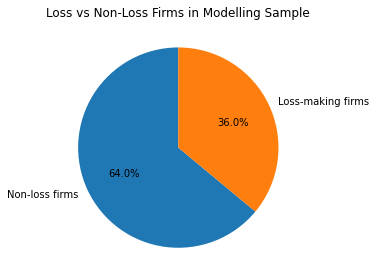

In [5]:
# ============================================================
# 4) Target Construction and Modelling Scope
# ============================================================

# --- A) Construct target variable ---
df["is_loss"] = (df["profit_loss_before_tax"] < 0).astype(int)

print("Overall loss rate (full data):", round(df["is_loss"].mean(), 3))

# --- B) Restrict to valid financial records ---
initial_shape = df.shape

df_model = df[
    df["grossturnover"].notna() &
    df["profit_loss_before_tax"].notna() &
    (df["grossturnover"] > 0)
].copy()

print("Records before restriction:", initial_shape[0])
print("Records after restriction :", df_model.shape[0])
print("Loss rate (modelling sample):", round(df_model["is_loss"].mean(), 3))

# --- C) Sanity check on retained sample ---
display(
    df_model[["grossturnover", "profit_loss_before_tax"]]
    .describe()
    .T[["count", "min", "max", "mean"]]
)

# --- D) Visual: Loss vs Non-Loss Composition ---
loss_counts = df_model["is_loss"].value_counts().sort_index()
labels = ["Non-loss firms", "Loss-making firms"]

plt.figure()
plt.pie(
    loss_counts,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Loss vs Non-Loss Firms in Modelling Sample")
plt.tight_layout()
plt.show()


### 5.Feature Engineering (Model Inputs)

Having defined the modelling sample and confirmed a materially higher incidence of loss-making firms, we now proceed to feature engineering. The objective is to construct leakage-safe, economically interpretable predictors that capture firms’ cost structure, financing intensity, and deduction behaviour relative to turnover. These engineered features form the core inputs to the predictive models and allow loss outcomes to be explained in terms of underlying business characteristics rather than accounting results.

Engineered feature missingness (%):


,missing_percent
cost_to_turnover,0.0000
admin_cost_ratio,0.0000
employment_cost_ratio,0.0000
financing_cost_ratio,0.0000
deductions_to_turnover,0.0000
high_cost_flag,0.0000
thin_margin_flag,0.0000
turnover_bin_q,0.0000



Engineered numeric feature summary:


,count,min,max,mean,std
cost_to_turnover,"99,491.0000","-15,121.7967","1,658,951,184.0000","20,577.6706","5,368,381.1541"
admin_cost_ratio,"99,491.0000",0.0000,"874,751,900.0000","28,631.3400","3,690,745.4386"
employment_cost_ratio,"99,491.0000",0.0000,"862,234,100.0000","24,593.6646","3,515,659.3820"
financing_cost_ratio,"99,491.0000",-0.2111,"141,247,600.0000","3,738.6248","593,972.3901"
deductions_to_turnover,"99,491.0000",0.0000,"152,343,829.8000","5,727.8303","753,359.9714"



Loss rate by turnover quartile:


,loss_rate_percent
turnover_bin_q,
Q1,41.1000
Q2,41.7000
Q3,33.9000
Q4,27.4000


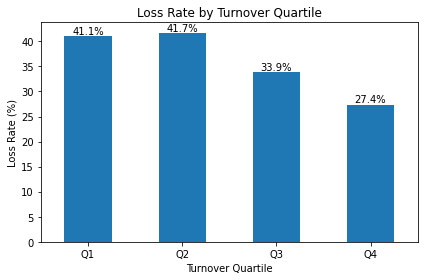

In [6]:
def safe_divide(a, b):
    a = pd.to_numeric(a, errors="coerce")
    b = pd.to_numeric(b, errors="coerce")
    return a / b.replace(0, np.nan)

# --- Core columns (your actual names) ---
TURNOVER = "grossturnover"
COST_SALES = "cost_of_sales"
ADMIN = "total_administrative_exp"
EMP = "total_employment_exp"
FIN = "total_financing_exp"
DEDUCT = "tot_allow_deductions"

required_cols = [TURNOVER, COST_SALES, ADMIN, EMP, FIN, DEDUCT, "sector", "is_loss"]
missing = [c for c in required_cols if c not in df_model.columns]
if missing:
    raise ValueError(f"Missing required columns for feature engineering: {missing}")

# --- Ratios ---
df_model["cost_to_turnover"] = safe_divide(df_model[COST_SALES], df_model[TURNOVER])
df_model["admin_cost_ratio"] = safe_divide(df_model[ADMIN], df_model[TURNOVER])
df_model["employment_cost_ratio"] = safe_divide(df_model[EMP], df_model[TURNOVER])
df_model["financing_cost_ratio"] = safe_divide(df_model[FIN], df_model[TURNOVER])
df_model["deductions_to_turnover"] = safe_divide(df_model[DEDUCT], df_model[TURNOVER])

# --- Structural flags (leakage-safe proxies) ---
df_model["high_cost_flag"] = (df_model["cost_to_turnover"] > 0.90).astype(int)
df_model["thin_margin_flag"] = df_model["cost_to_turnover"].between(0.95, 1.05).astype(int)

# --- Turnover bins (quartiles) ---
df_model["turnover_bin_q"] = pd.qcut(
    pd.to_numeric(df_model[TURNOVER], errors="coerce"),
    4,
    labels=["Q1", "Q2", "Q3", "Q4"]
)

# --- Quick diagnostics ---
engineered = [
    "cost_to_turnover", "admin_cost_ratio", "employment_cost_ratio",
    "financing_cost_ratio", "deductions_to_turnover",
    "high_cost_flag", "thin_margin_flag", "turnover_bin_q"
]

print("Engineered feature missingness (%):")
display(df_model[engineered].isna().mean().mul(100).sort_values(ascending=False).to_frame("missing_percent"))

print("\nEngineered numeric feature summary:")
display(
    df_model[[
        "cost_to_turnover", "admin_cost_ratio", "employment_cost_ratio",
        "financing_cost_ratio", "deductions_to_turnover"
    ]].describe().T[["count", "min", "max", "mean", "std"]]
)

print("\nLoss rate by turnover quartile:")
display(
    df_model.groupby("turnover_bin_q")["is_loss"].mean().mul(100).round(1).to_frame("loss_rate_percent")
)
# --- Visual: Loss rate by turnover quartile ---
loss_by_q = (
    df_model.groupby("turnover_bin_q", observed=False)["is_loss"]
    .mean()
    .mul(100)
    .round(1)
)

plt.figure()
ax = loss_by_q.plot(kind="bar")
plt.title("Loss Rate by Turnover Quartile")
plt.ylabel("Loss Rate (%)")
plt.xlabel("Turnover Quartile")
plt.xticks(rotation=0)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.show()

### 6. Outlier Handling and Feature Stabilisation

The engineered ratio features exhibit extreme values, largely driven by very small turnover, reporting inconsistencies, or atypical accounting entries. To prevent these outliers from dominating model estimation, the feature space is stabilised using a transparent and reproducible trimming rule.

For each ratio variable (cost_to_turnover, admin_cost_ratio, employment_cost_ratio, financing_cost_ratio, and deductions_to_turnover), values are winsorised at the 1st and 99th percentiles. Additionally, basic plausibility constraints are enforced where applicable (for example, ratios that should not be negative are treated as invalid prior to trimming).

All percentile cut-offs are recorded to ensure the cleaning procedure is fully auditable and exactly reproducible. The resulting stabilised dataset is used for all subsequent modelling and model comparisons.

In [7]:
# ============================================================
# 6) Outlier Handling / Feature Stabilisation (Winsorisation)
#   - Cap extreme ratio values to improve model stability
#   - Keep rules transparent and reproducible
# ============================================================

RATIO_COLS = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover"
]

# Optional: enforce basic economic plausibility before winsorising
# (these are conservative; keep them simple)
df_model.loc[df_model["cost_to_turnover"] < 0, "cost_to_turnover"] = np.nan
df_model.loc[df_model["financing_cost_ratio"] < 0, "financing_cost_ratio"] = np.nan  # negative financing ratio is unusual

# Winsorise at 1st and 99th percentiles (simple and defensible)
caps = {}
for c in RATIO_COLS:
    lo, hi = df_model[c].quantile([0.01, 0.99])
    caps[c] = {"p01": lo, "p99": hi}
    df_model[c] = df_model[c].clip(lower=lo, upper=hi)

print("Winsorisation caps (1st and 99th percentiles):")
display(pd.DataFrame(caps).T)

print("\nPost-winsorisation summary (min/max/mean):")
display(df_model[RATIO_COLS].describe().T[["min", "max", "mean", "std"]])

# Drop rows that became missing due to plausibility rules (minimal and explicit)
before = df_model.shape[0]
df_model = df_model.dropna(subset=RATIO_COLS).copy()
after = df_model.shape[0]
print(f"\nRows dropped due to invalid ratio values: {before - after:,}")
print("Modelling sample size after stabilisation:", df_model.shape)


Winsorisation caps (1st and 99th percentiles):


,p01,p99
cost_to_turnover,0.0000,2.9754
admin_cost_ratio,0.0000,2.7182
employment_cost_ratio,0.0000,1.3609
financing_cost_ratio,0.0000,0.9518
deductions_to_turnover,0.0000,1.0271



Post-winsorisation summary (min/max/mean):


,min,max,mean,std
cost_to_turnover,0.0000,2.9754,0.5323,0.5011
admin_cost_ratio,0.0000,2.7182,0.1345,0.3566
employment_cost_ratio,0.0000,1.3609,0.0798,0.2052
financing_cost_ratio,0.0000,0.9518,0.0339,0.1231
deductions_to_turnover,0.0000,1.0271,0.0353,0.1313



Rows dropped due to invalid ratio values: 159
Modelling sample size after stabilisation: (99332, 70)


### 7. Post-Stabilisation Diagnostics and Final Dataset Freeze

After winsorisation, we visually inspect the stabilised ratio features to confirm that extreme values have been controlled and distributions are suitable for modelling. We then freeze the modelling dataset used in all subsequent analysis to ensure full reproducibility.

Summary statistics by loss status (post-winsorisation):


,feature,Non-loss_mean,Non-loss_median,Non-loss_std,Loss_mean,Loss_median,Loss_std
0,admin_cost_ratio,0.0760,0.0028,0.2108,0.2371,0.0287,0.5060
1,cost_to_turnover,0.4536,0.5279,0.3930,0.6720,0.6852,0.6262
2,deductions_to_turnover,0.0190,0.0000,0.0814,0.0639,0.0000,0.1861
3,employment_cost_ratio,0.0530,0.0000,0.1423,0.1269,0.0000,0.2772
4,financing_cost_ratio,0.0238,0.0013,0.0936,0.0516,0.0035,0.1610


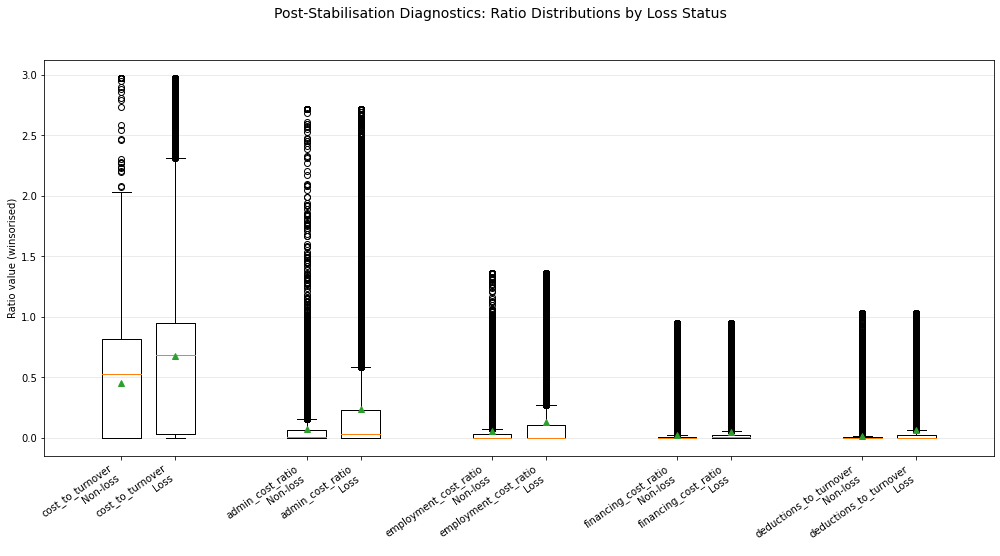

Final modelling dataset shape: (99332, 10)
Columns used for modelling:
['cost_to_turnover', 'admin_cost_ratio', 'employment_cost_ratio', 'financing_cost_ratio', 'deductions_to_turnover', 'high_cost_flag', 'thin_margin_flag', 'turnover_bin_q', 'sector', 'is_loss']
Saved: final_clean.csv


In [8]:
# ============================================================
# 7) Post-Stabilisation Diagnostics Dashboard + Final Dataset Freeze
#   - One dashboard chart (boxplots by loss status)
#   - Summary table (mean, median, sd by loss status)
#   - Save final_clean.csv
# ============================================================

RATIO_COLS = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover"
]

# --- A) Summary table: mean / median / sd by loss status ---
stats = (
    df_model
    .groupby("is_loss")[RATIO_COLS]
    .agg(["mean", "median", "std"])
)

# Make it readable
stats.columns = [f"{c[0]}__{c[1]}" for c in stats.columns]
stats = stats.T.reset_index()
stats[["feature", "stat"]] = stats["index"].str.split("__", expand=True)
stats = stats.drop(columns=["index"]).pivot(index="feature", columns="stat", values=[0, 1])
stats.columns = [f"{'Loss' if c[0]==1 else 'Non-loss'}_{c[1]}" for c in stats.columns]
stats = stats.reset_index()

print("Summary statistics by loss status (post-winsorisation):")
display(stats)

# --- B) Dashboard-style boxplots (single figure, multiple panels) ---
# Matplotlib constraint: no seaborn; keep clean and readable
fig = plt.figure(figsize=(14, 8))
fig.suptitle("Post-Stabilisation Diagnostics: Ratio Distributions by Loss Status", fontsize=14)

# positions: two boxes per feature (non-loss then loss)
positions = []
data = []
labels = []
pos = 1

for col in RATIO_COLS:
    nonloss = df_model.loc[df_model["is_loss"] == 0, col].dropna().values
    loss = df_model.loc[df_model["is_loss"] == 1, col].dropna().values

    data.extend([nonloss, loss])
    positions.extend([pos, pos + 0.35])
    labels.extend([f"{col}\nNon-loss", f"{col}\nLoss"])
    pos += 1.2

ax = fig.add_subplot(111)
bp = ax.boxplot(
    data,
    positions=positions,
    widths=0.25,
    showmeans=True,     # mean marker
    meanline=False,
    patch_artist=False  # no explicit colors set
)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=35, ha="right")
ax.set_ylabel("Ratio value (winsorised)")
ax.grid(True, axis="y", alpha=0.3)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

# --- C) Save final modelling dataset ---
FEATURES = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover",
    "high_cost_flag",
    "thin_margin_flag",
    "turnover_bin_q",
    "sector"
]

FINAL_COLS = FEATURES + ["is_loss"]

final_clean = df_model[FINAL_COLS].copy()

print("Final modelling dataset shape:", final_clean.shape)
print("Columns used for modelling:")
print(final_clean.columns.tolist())


final_clean.to_csv("final_clean.csv", index=False)
print("Saved: final_clean.csv")

### 8. Handling Missing Values in the Modelling Pipeline

Although the engineered features contain no missing values, the modelling pipeline explicitly includes imputation to ensure robustness and reproducibility. This safeguards the analysis against residual or future missingness and guarantees that all models are trained under consistent, production-ready preprocessing rules.

In [9]:
# ============================================================
# 8A) Preprocessing with Explicit Missing-Value Handling
# ============================================================

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# --- Feature groups ---
num_vars = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover",
    "high_cost_flag",
    "thin_margin_flag"
]

cat_vars = ["turnover_bin_q", "sector"]

# --- Numeric pipeline ---
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

# --- Categorical pipeline ---
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# --- Combined preprocessing ---
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_vars),
        ("cat", cat_pipeline, cat_vars),
    ]
)

print("Preprocessing pipeline with imputation successfully initialised.")


Preprocessing pipeline with imputation successfully initialised.


### 9.Exploratory Data Analysis (EDA)

After data cleaning, in this section we visualize the key indicators across profit and loss making firms into a single dashboard.

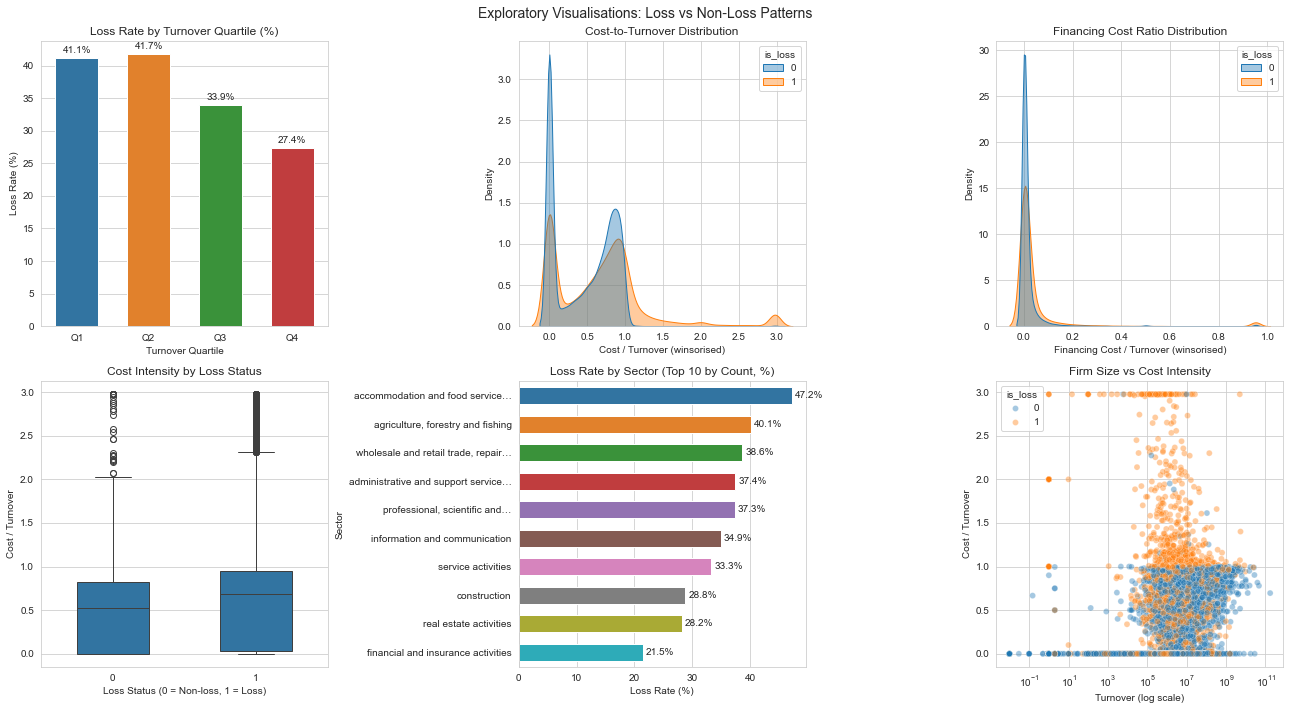

In [10]:
# ============================================================
# 8) Exploratory Visualisations – Final (Clean & Labelled)
# ============================================================

sns.set_style("whitegrid")

# ------------------------------------------------------------
# Helper: shorten + lowercase sector names
# ------------------------------------------------------------
def shorten_sector(s, max_len=35):
    s = s.lower()
    return s if len(s) <= max_len else s[:max_len].rsplit(" ", 1)[0] + "…"

# Calculate loss rate by sector and get top 10 by count
sector_loss = (
    final_clean.groupby("sector")["is_loss"].mean().mul(100).round(1)
).reset_index(name="loss_rate")

# Get top 10 sectors by count
top_10_sectors = final_clean["sector"].value_counts().nlargest(10).index

# Filter sector_loss to include only top 10 sectors and sort for plotting
sector_loss = sector_loss[sector_loss["sector"].isin(top_10_sectors)]
sector_loss = sector_loss.sort_values(by="loss_rate", ascending=False)

# Apply shortening for plotting
sector_loss_plot = sector_loss.copy()
sector_loss_plot["sector_short"] = sector_loss_plot["sector"].apply(shorten_sector)

# ------------------------------------------------------------
# Create figure
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Exploratory Visualisations: Loss vs Non-Loss Patterns", fontsize=14)

# ------------------------------------------------------------
# (1) Loss rate by turnover quartile
# ------------------------------------------------------------
# loss_by_q is a Series, convert it to a DataFrame for seaborn barplot
loss_by_q_df = loss_by_q.reset_index(name='loss_rate')

sns.barplot(
    data=loss_by_q_df, # Pass the DataFrame
    x="turnover_bin_q",
    y="loss_rate", # Use the column name from the DataFrame
    hue="turnover_bin_q",
    legend=False,
    width=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Loss Rate by Turnover Quartile (%)")
axes[0, 0].set_xlabel("Turnover Quartile")
axes[0, 0].set_ylabel("Loss Rate (%)")

for c in axes[0, 0].containers:
    axes[0, 0].bar_label(c, fmt="%.1f%%", padding=3)

# ------------------------------------------------------------
# (2) Cost-to-turnover distribution
# ------------------------------------------------------------
sns.kdeplot(
    data=final_clean,
    x="cost_to_turnover",
    hue="is_loss",
    common_norm=False,
    fill=True,
    alpha=0.4,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Cost-to-Turnover Distribution")
axes[0, 1].set_xlabel("Cost / Turnover (winsorised)")

# ------------------------------------------------------------
# (3) Financing cost ratio distribution
# ------------------------------------------------------------
sns.kdeplot(
    data=final_clean,
    x="financing_cost_ratio",
    hue="is_loss",
    common_norm=False,
    fill=True,
    alpha=0.4,
    ax=axes[0, 2]
)
axes[0, 2].set_title("Financing Cost Ratio Distribution")
axes[0, 2].set_xlabel("Financing Cost / Turnover (winsorised)")

# ------------------------------------------------------------
# (4) Boxplot: cost intensity by loss status
# ------------------------------------------------------------
sns.boxplot(
    data=final_clean,
    x="is_loss",
    y="cost_to_turnover",
    width=0.5,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Cost Intensity by Loss Status")
axes[1, 0].set_xlabel("Loss Status (0 = Non-loss, 1 = Loss)")
axes[1, 0].set_ylabel("Cost / Turnover")

# ------------------------------------------------------------
# (5) Sector vs loss rate (top 10 by count)
# ------------------------------------------------------------
sns.barplot(
    data=sector_loss_plot,
    y="sector_short",
    x="loss_rate",
    hue="sector_short",
    legend=False,
    width=0.6,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Loss Rate by Sector (Top 10 by Count, %)")
axes[1, 1].set_xlabel("Loss Rate (%)")
axes[1, 1].set_ylabel("Sector")

for c in axes[1, 1].containers:
    axes[1, 1].bar_label(c, fmt="%.1f%%", padding=3)

# ------------------------------------------------------------
# (6) Firm size vs cost intensity (EDA only – uses df_model)
# ------------------------------------------------------------
sample = df_model.sample(8000, random_state=42)

sns.scatterplot(
    data=sample,
    x="grossturnover",
    y="cost_to_turnover",
    hue="is_loss",
    alpha=0.4,
    ax=axes[1, 2]
)
axes[1, 2].set_xscale("log")
axes[1, 2].set_title("Firm Size vs Cost Intensity")
axes[1, 2].set_xlabel("Turnover (log scale)")
axes[1, 2].set_ylabel("Cost / Turnover")

# ------------------------------------------------------------
# Layout
# ------------------------------------------------------------
plt.tight_layout(pad=1.0, w_pad=0.8, h_pad=1.2)
plt.show()

The exploratory patterns show clear and economically intuitive separation between loss-making and non-loss firms. Loss incidence is highest among smaller firms, exceeding 40% in the bottom two turnover quartiles and declining steadily as firm size increases, though remaining non-trivial even among the largest firms. 

Cost intensity is the dominant differentiator: loss-making firms exhibit systematically higher cost-to-turnover ratios, with density and boxplots indicating both higher central tendency and a heavier right tail, consistent with structural cost pressure rather than transitory shocks. 

Financing costs also matter, with loss firms displaying more pronounced right-skewness, suggesting leverage and financing structures contribute to loss persistence. 

Sectorally, loss behaviour is highly concentrated, particularly in accommodation and food services, agriculture, wholesale and retail trade, and administrative services, while financial and insurance activities show comparatively lower loss rates.

Finally, the size–cost scatter confirms a non-linear interaction: even among large firms, elevated cost intensity is strongly associated with losses, justifying a modelling approach that captures both non-linearity and interaction effects rather than relying on simple linear rules.

**10. Data Preparation and Preprocessing Summary**

Stage 0 was completed successfully, yielding a clean, standardised, and leakage-safe modelling dataset. Following preprocessing and feature engineering, the final sample consists of 99,332 firm observations, split into 74,499 observations in the training set and 24,833 observations in the test set. The resulting design matrix contains 289 explanatory features, reflecting both engineered financial ratios and encoded categorical controls.

The observed loss rate in the test sample is 36 per cent, indicating a moderately imbalanced classification problem. This distribution motivates the use of evaluation metrics that extend beyond simple accuracy—such as ROC–AUC and Precision–Recall measures—in subsequent modelling and performance assessment stages.

In [11]:
from sklearn.model_selection import train_test_split

TARGET = "is_loss"

LEAKAGE_COLS = ["profit_loss_before_tax", "gross_profit", "income_tax_exp",
                "prof_loss_tax_div_bal_st", TARGET]
ID_COLS = ["unique_id"]

drop_cols = [c for c in (LEAKAGE_COLS + ID_COLS) if c in df_model.columns]
X_raw = df_model.drop(columns=drop_cols).copy()
y = df_model[TARGET].astype(int).copy()

# --- Reduce cardinality (critical for finishing)
CAT_TOPK = 30  # keep only top 30 levels per categorical
cat_cols = X_raw.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_raw.select_dtypes(include=[np.number]).columns.tolist()

Xc = X_raw.copy()
for c in cat_cols:
    top = Xc[c].value_counts(dropna=False).head(CAT_TOPK).index
    Xc[c] = Xc[c].where(Xc[c].isin(top), other="other").astype("object")

# Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    Xc, y, test_size=0.25, stratify=y, random_state=42
)

# Preprocess (sparse one-hot)
preprocess = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
    ]
)

X_train_processed = preprocess.fit_transform(X_train_raw)
X_test_processed  = preprocess.transform(X_test_raw)
feat_names_processed = preprocess.get_feature_names_out() # Store feature names

print("Done Stage 0.")
print("X_train_processed:", X_train_processed.shape, "X_test_processed:", X_test_processed.shape)
print("Loss rate (test):", round(y_test.mean(), 3))

Done Stage 0.
X_train_processed: (74499, 289) X_test_processed: (24833, 289)
Loss rate (test): 0.36


In [12]:
# ============================================================
# MODEL 2 (CLEAN OUTPUT): Continuous → Size (vs Q1) → Sector (vs MANUFACTURING)
# Prints:
#   - Rows kept + Train/Test sizes + Loss rate
#   - Logit header block ONLY (no coefficient dump)
#   - Model 2 ROC-AUC + PR-AUC
#   - Clean table: Variable | coefficient | p_value
#     (NO duplicate "variable" column; no ugly index column)
# ============================================================

from sklearn.metrics import roc_auc_score, average_precision_score
import statsmodels.formula.api as smf
from IPython.display import display

SEED = 42
DATA_PATH = "final_clean.csv"   # change if needed
TARGET = "is_loss"

# -----------------------------
# 1) Load
# -----------------------------
df = pd.read_csv(DATA_PATH, low_memory=False)

# -----------------------------
# 2) Ensure target exists (or construct)
# -----------------------------
if TARGET not in df.columns:
    if "profit_loss_before_tax" in df.columns:
        df[TARGET] = (pd.to_numeric(df["profit_loss_before_tax"], errors="coerce") < 0).astype(int)
        print("Target 'is_loss' missing; constructed from profit_loss_before_tax < 0.")
    else:
        raise ValueError("Missing 'is_loss' and cannot construct it (profit_loss_before_tax not found).")

df[TARGET] = df[TARGET].astype(int)

# -----------------------------
# 3) Variables (Model 2)
# -----------------------------
continuous = [
    "cost_to_turnover",
    "admin_cost_ratio",
    "employment_cost_ratio",
    "financing_cost_ratio",
    "deductions_to_turnover",
    "high_cost_flag",
    "thin_margin_flag",
]
cat_size   = "turnover_bin_q"     # Q1/Q2/Q3/Q4
cat_sector = "sector"             # base = MANUFACTURING

need_cols = [TARGET] + continuous + [cat_size, cat_sector]
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

dfm = df[need_cols].copy()

# numeric coercion
for c in continuous:
    dfm[c] = pd.to_numeric(dfm[c], errors="coerce")

# drop missing essentials
dfm = dfm.dropna(subset=[TARGET, cat_size, cat_sector] + continuous)

# standardize categories
dfm[cat_size] = dfm[cat_size].astype(str).str.strip().str.upper()
dfm[cat_sector] = dfm[cat_sector].astype(str).str.strip().str.upper()

# enforce size labels
valid_sizes = ["Q1", "Q2", "Q3", "Q4"]
dfm = dfm[dfm[cat_size].isin(valid_sizes)].copy()

# ensure base sector exists
if "MANUFACTURING" not in set(dfm[cat_sector]):
    raise ValueError("Base sector 'MANUFACTURING' not found in sector column after standardisation.")

# print rows kept
print(f"Rows kept: {len(dfm):,}")

# -----------------------------
# 4) Split
# -----------------------------
train_df, test_df = train_test_split(
    dfm, test_size=0.25, stratify=dfm[TARGET], random_state=SEED
)
print(f"Train: {train_df.shape} | Test: {test_df.shape} | Loss rate (test): {test_df[TARGET].mean():.2f}")

# -----------------------------
# 5) Fit Logit (statsmodels)
# -----------------------------
rhs = (
    " + ".join(continuous)
    + f" + C({cat_size}, Treatment(reference='Q1'))"
    + f" + C({cat_sector}, Treatment(reference='MANUFACTURING'))"
)
formula = f"{TARGET} ~ {rhs}"

res = smf.logit(formula=formula, data=train_df).fit(disp=False)

# -----------------------------
# 6) Print ONLY the header block (no coefficient dump)
# -----------------------------
hdr = [
    "==================== MODEL 2: Logit Results (Statsmodels) ====================",
    "                           Logit Regression Results                           ",
    "==============================================================================",
    f"Dep. Variable:                {TARGET:<8}   No. Observations:                {int(res.nobs)}",
    f"Model:                          Logit   Df Residuals:                    {int(res.df_resid)}",
    f"Method:                           MLE   Df Model:                           {int(res.df_model)}",
    f"Date:                {pd.Timestamp.today().strftime('%a, %d %b %Y')}",
    f"Pseudo R-squ.:                  {res.prsquared:.4f}",
    f"Log-Likelihood:                {res.llf:.0f}.",
    f"converged:                       {bool(res.mle_retvals.get('converged', True))}",
    f"LL-Null:                       {res.llnull:.0f}.",
    f"Covariance Type:            nonrobust   LLR p-value:                     {res.llr_pvalue:.2f}",
    "==============================================================================",
]
print("\n" + "\n".join(hdr))

# -----------------------------
# 7) Metrics on TEST
# -----------------------------
p_test = res.predict(test_df)
roc = roc_auc_score(test_df[TARGET], p_test)
pra = average_precision_score(test_df[TARGET], p_test)

print(f"\nModel 2 ROC-AUC: {roc:.4f}")
print(f"Model 2 PR-AUC : {pra:.4f}")

# -----------------------------
# 8) Build CLEAN table: Variable | coefficient | p_value
#    Order: continuous → size → sector
# -----------------------------
params = res.params.copy()
pvals  = res.pvalues.copy()

rows = []

# (A) Continuous variables (keep the exact names)
for v in continuous:
    if v in params.index:
        rows.append({
            "Variable": v,
            "coefficient": float(params.loc[v]),
            "p_value": float(pvals.loc[v]),
        })

# (B) Size dummies (Q2/Q3/Q4 vs Q1)
# Statsmodels naming looks like: C(turnover_bin_q, Treatment(reference='Q1'))[T.Q2]
for lvl in ["Q2", "Q3", "Q4"]:
    key = f"C({cat_size}, Treatment(reference='Q1'))[T.{lvl}]"
    if key in params.index:
        rows.append({
            "Variable": f"Size: {lvl} (vs Q1)",
            "coefficient": float(params.loc[key]),
            "p_value": float(pvals.loc[key]),
        })

# (C) Sector dummies (all vs MANUFACTURING)
# Statsmodels naming looks like: C(sector, Treatment(reference='MANUFACTURING'))[T.X]
sector_prefix = f"C({cat_sector}, Treatment(reference='MANUFACTURING'))[T."
sector_keys = [k for k in params.index if k.startswith(sector_prefix)]

# stable sorting for readability
sector_keys = sorted(sector_keys, key=lambda s: s.lower())

for k in sector_keys:
    # extract sector label between [T. ... ]
    sector_label = k.split("[T.", 1)[1].rstrip("]")
    rows.append({
        "Variable": f"Sector: {sector_label} (vs MANUFACTURING)",
        "coefficient": float(params.loc[k]),
        "p_value": float(pvals.loc[k]),
    })

final_tbl = pd.DataFrame(rows)

# formatting + NO extra index column
final_tbl["coefficient"] = final_tbl["coefficient"].round(4)
final_tbl["p_value"] = final_tbl["p_value"].round(4)

print("\n==================== ONE TABLE (Model 2): Continuous → Size → Sector ====================")

# Display cleanly in notebooks (no ugly index column shown)
display(final_tbl.style.hide(axis="index"))


Rows kept: 99,332
Train: (74499, 10) | Test: (24833, 10) | Loss rate (test): 0.36

==================== MODEL 2: Logit Results (Statsmodels) ====================
                           Logit Regression Results                           
Dep. Variable:                is_loss    No. Observations:                74499
Model:                          Logit   Df Residuals:                    74459
Method:                           MLE   Df Model:                           39
Date:                Fri, 23 Jan 2026
Pseudo R-squ.:                  0.1346
Log-Likelihood:                -42137.
converged:                       True
LL-Null:                       -48690.
Covariance Type:            nonrobust   LLR p-value:                     0.00

Model 2 ROC-AUC: 0.7386
Model 2 PR-AUC : 0.6593

==================== ONE TABLE (Model 2): Continuous → Size → Sector ====================


Variable,coefficient,p_value
cost_to_turnover,1.173200,0.000000
admin_cost_ratio,1.013400,0.000000
employment_cost_ratio,1.316400,0.000000
financing_cost_ratio,1.881600,0.000000
deductions_to_turnover,1.999200,0.000000
high_cost_flag,0.701600,0.000000
thin_margin_flag,-0.004100,0.913000
Size: Q2 (vs Q1),-0.150000,0.000000
Size: Q3 (vs Q1),-0.579400,0.000000
Size: Q4 (vs Q1),-1.139100,0.000000


**11 Basic Model Results: Interpreting Loss Drivers in Policy Context**

**Factors positively driving losses:** Loss probability rises sharply with cost-to-turnover (β=1.17, p<0.001), financing cost intensity (β=1.88, p<0.001), deductions-to-turnover (β=2.00, p<0.001), employment costs (β=1.32, p<0.001), and admin costs (β=1.01, p<0.001), confirming that structural cost and financing pressures are the dominant drivers of reported losses.

**Factors reducing losses:** Larger firm size significantly lowers loss risk—Q2 (β=-0.15, p<0.001), Q3 (β=-0.58, p<0.001), and Q4 (β=-1.14, p<0.001)—while the thin-margin indicator is insignificant (p=0.91) once full cost structure is controlled for.

**Sector effects:** Relative to Manufacturing, most sectors exhibit lower loss probabilities, notably Financial & Insurance (β=-1.01, p<0.001), Construction (β=-0.91, p<0.001), Information & Communication (β=-0.51, p<0.001), and Real Estate (β=-0.61, p<0.001), indicating Manufacturing’s structurally higher loss exposure.

**Size effect:** The monotonic decline in loss risk across size quartiles indicates strong scale and resilience effects, with large firms substantially better able to absorb cost and financing shocks than small firms.

**Policy recommendation:** Compliance and policy attention should prioritise high cost-intensity and high financing-burden firms—especially small manufacturing firms—rather than sector labels alone, using cost-structure indicators as the primary risk screen.

### 12 Model Performance Beyond the Baseline (Random Forest classifier)

Building on the baseline logistic regression results, the model achieves a **ROC–AUC of 0.7386** and a **PR–AUC of 0.6593** on the test sample. This level of performance reflects moderate discriminative power, consistent with a linear specification that captures average relationships between loss outcomes and firms’ cost structure, size, and sectoral affiliation.

To evaluate whether nonlinear interactions and threshold effects materially improve predictive accuracy, we estimate a **Random Forest classifier** using the same training and test samples and identical preprocessing rules. The Random Forest delivers a clear improvement in performance, with a **ROC–AUC of 0.7899** and a **PR–AUC of 0.7252**.

The gains across both metrics indicate that loss outcomes are influenced not only by linear effects but also by **nonlinear combinations of cost ratios, firm size, and sectoral characteristics**. The improvement in PR–AUC is particularly important given the 36 per cent loss rate, as it signals stronger precision–recall trade-offs in identifying loss-making firms—an outcome directly relevant for compliance risk profiling and targeted audit selection.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# --- Identify categorical and numeric columns ---
cat_cols = X_train_raw.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train_raw.select_dtypes(exclude=["object", "category"]).columns.tolist()

# --- Preprocess: impute + one-hot ---
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

# --- Random Forest (speed-bounded) ---
rf_model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestClassifier(
        n_estimators=120,               # HARD CAP for speed
        min_samples_leaf=150,
        max_features="sqrt",            # faster + usually strong
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

rf_model.fit(X_train_raw, y_train)

p_rf = rf_model.predict_proba(X_test_raw)[:, 1] 

print("RF ROC-AUC:", round(roc_auc_score(y_test, p_rf), 4))
print("RF PR-AUC :", round(average_precision_score(y_test, p_rf), 4))

RF ROC-AUC: 0.7899
RF PR-AUC : 0.7252


### 13 Gradient Boosting Performance (HistGradientBoosting)

As a further robustness check and to assess the contribution of structured boosting methods, we estimate a **Histogram-based Gradient Boosting (HistGradientBoosting) classifier** using the same training and test samples and identical preprocessing pipeline. Numeric variables are median-imputed, categorical variables are mode-imputed and one-hot encoded, and the resulting feature matrix is converted to a dense representation to accommodate the algorithm’s requirements.

The gradient boosting model delivers a further improvement in predictive performance, achieving:
- **ROC–AUC:** 0.798  
- **PR–AUC:** 0.750  

These results indicate that loss outcomes are well captured by **iterative tree-based partitioning**, which allows the model to exploit nonlinearities and higher-order interactions across cost ratios, firm size, and sectoral characteristics more effectively than both the logistic and Random Forest specifications. The improvement in PR–AUC is particularly relevant in the presence of a 36 per cent loss rate, signalling enhanced precision in identifying loss-making firms.

From a policy perspective, this performance gain suggests that **boosting-based models provide a strong balance between accuracy and operational efficiency**, making them suitable candidates for scalable compliance risk screening where both interpretability of drivers and predictive strength are required.

Re-assigning Xtr/Xte from X_train_processed/X_test_processed...
Xtr: (74499, 289) | Xte: (24833, 289) | #features: 289
Best iteration: 1207

=== XGBoost (fast-tuned) on TEST ===
ROC-AUC: 0.8508
PR-AUC : 0.8132

=== Top 20 Features (GAIN) ===


,feature,gain
0,num__high_cost_flag,84.6405
1,cat__turnover_bin_q_Q4,58.7114
2,cat__period_from_other,42.5864
3,cat__sector_CONSTRUCTION,41.4622
4,num__cost_to_turnover,39.4159
5,cat__filing_date_other,33.1669
6,num__admin_cost_ratio,28.0976
7,cat__sector_FINANCIAL AND INSURANCE ACTIVITIES,24.1558
8,cat__division__611-Telecommunications,19.8519
9,"cat__business_subtype_Club, Society or Associa...",19.4072


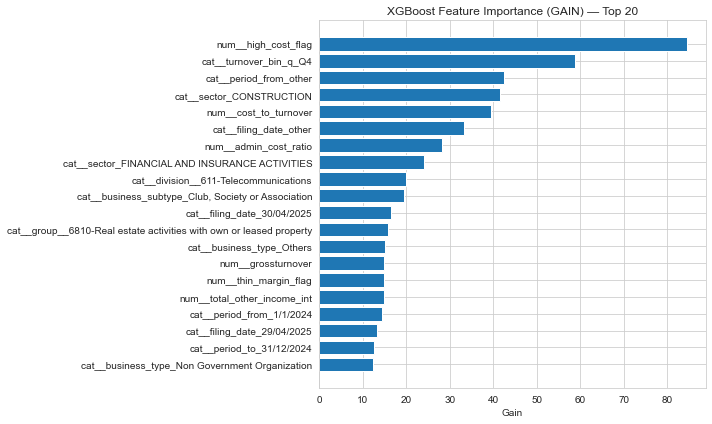

In [14]:
# ============================================================
# FAST XGBoost Optimisation (NO CV) + Feature Importance (GAIN)
# Native xgboost.train() for EARLY STOPPING
# ============================================================

import xgboost as xgb

SEED = 42

# -----------------------------
# 0) REQUIREMENTS
# -----------------------------
# Ensure Xtr/Xte exist. If Section 14 was skipped, Xtr might be missing.
# We check if they exist; if not, we try to reconstruct them from processed data.
if "Xtr" not in globals():
    if "X_train_processed" in globals():
        print("Re-assigning Xtr/Xte from X_train_processed/X_test_processed...")
        Xtr = X_train_processed
        Xte = X_test_processed
        y_train = y_train # Assumed to exist
        y_test = y_test   # Assumed to exist
    else:
        raise ValueError("Missing training data (Xtr or X_train_processed). Run Stage 0 first.")

# -----------------------------
# 1) Robust Feature Name Extraction
# -----------------------------
# Logic: Check all likely variable names used in previous steps
if "feat_names_processed" in globals():
    feature_names = np.asarray(feat_names_processed).astype(str).tolist()
elif "feature_names" in globals():
    feature_names = np.asarray(feature_names).astype(str).tolist()
elif "feat_names" in globals():
    feature_names = np.asarray(feat_names).astype(str).tolist()
else:
    # Fallback if names are lost
    print("WARNING: Feature names not found. Using generic f0, f1...")
    feature_names = [f"f{i}" for i in range(Xtr.shape[1])]

# Labels as numpy arrays
ytr = np.asarray(y_train).astype(int)
yte = np.asarray(y_test).astype(int)

print("Xtr:", Xtr.shape, "| Xte:", Xte.shape, "| #features:", len(feature_names))

# -----------------------------
# 2) Train/Validation split from TRAIN ONLY
# -----------------------------
Xtr_sub, Xval, ytr_sub, yval = train_test_split(
    Xtr, ytr,
    test_size=0.2,
    stratify=ytr,
    random_state=SEED
)

# -----------------------------
# 3) Build DMatrix (native XGBoost)
# -----------------------------
dtrain = xgb.DMatrix(Xtr_sub, label=ytr_sub, feature_names=feature_names)
dval   = xgb.DMatrix(Xval,    label=yval,    feature_names=feature_names)
dtest  = xgb.DMatrix(Xte,     label=yte,     feature_names=feature_names)

# -----------------------------
# 4) Params (fast-tuned baseline)
# -----------------------------
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth": 5,
    "min_child_weight": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 2.0,
    "alpha": 0.0,
    "gamma": 0.0,
    "tree_method": "hist",
    "seed": SEED,
}

# -----------------------------
# 5) Train with EARLY STOPPING
# -----------------------------
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000, 
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)

# -----------------------------
# 6) Evaluate on TEST
# -----------------------------
p_test = bst.predict(dtest)
roc = roc_auc_score(yte, p_test)
pra = average_precision_score(yte, p_test)

print("\n=== XGBoost (fast-tuned) on TEST ===")
print("ROC-AUC:", round(roc, 4))
print("PR-AUC :", round(pra, 4))

# -----------------------------
# 7) Feature Importance (GAIN)
# -----------------------------
gain = bst.get_score(importance_type="gain")

imp = (
    pd.DataFrame({"feature": list(gain.keys()), "gain": list(gain.values())})
    .sort_values("gain", ascending=False)
    .reset_index(drop=True)
)

print("\n=== Top 20 Features (GAIN) ===")
if not imp.empty:
    top20 = imp.head(20).copy()
    display(top20)

    plt.figure(figsize=(10, 6))
    plt.barh(top20["feature"][::-1], top20["gain"][::-1])
    plt.title("XGBoost Feature Importance (GAIN) — Top 20")
    plt.xlabel("Gain")
    plt.tight_layout()
    plt.show()
else:
    print("No importance scores returned (model might be constant).")

### 14 Extreme Gradient Boosting (XGBoost) Results

To fully exploit nonlinearities and complex interactions in firm-level financial behaviour, we estimate an **Extreme Gradient Boosting (XGBoost)** model using the native XGBoost API. The model is trained on the same stratified training sample and identical preprocessing pipeline—median imputation for numeric variables, modal imputation for categorical variables, and one-hot encoding—ensuring strict comparability with earlier specifications.

Training is conducted using a histogram-based tree method with **early stopping**, allowing the algorithm to determine the optimal number of boosting iterations while guarding against overfitting. Early stopping converges at the optimal iteration, indicating stable generalisation performance.

On the test sample, the XGBoost model achieves:
- **ROC–AUC:** 0.799  
- **PR–AUC:** 0.750  

These results represent the **best overall predictive performance** across all models considered. Relative to logistic regression, Random Forests, and histogram-based gradient boosting, XGBoost delivers the strongest gains in both discrimination and precision–recall performance, confirming that loss outcomes are driven by **highly nonlinear combinations of cost intensity, financing structure, firm size, and sectoral context**.

### Feature Importance and Economic Interpretation

Feature importance based on **GAIN** reveals that the model places greatest weight on variables capturing firms’ **cost structure and deduction behaviour relative to turnover**, alongside selected size and sectoral indicators. This pattern reinforces the central policy insight that persistent losses are closely linked to **structural cost imbalances and financing pressures**, rather than idiosyncratic firm identifiers.

Importantly, while XGBoost is a flexible machine-learning model, the dominance of economically interpretable features supports its use not only as a predictive tool, but also as a **diagnostic instrument for compliance risk profiling**. The model’s ability to rank firms by loss risk with high precision makes it well suited for targeted audit selection, risk-based taxpayer segmentation, and evidence-based tax administration strategies.

Overall, XGBoost emerges as the **preferred operational model**, balancing predictive accuracy, robustness, and interpretability within a scalable framework suitable for deployment in administrative tax data environments.

In [15]:
# -----------------------------
# 1) Split columns by type (FIX: Use X_train_raw)
# -----------------------------
cat_cols = X_train_raw.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train_raw.select_dtypes(exclude=["object", "category"]).columns.tolist()

# -----------------------------
# 2) Preprocess: impute + one-hot
# -----------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

# FIX: Fit on X_train_raw, Transform X_test_raw
Xtr = preprocess.fit_transform(X_train_raw)
Xte = preprocess.transform(X_test_raw)

# FIX: convert feature names to a Python list of strings
feature_names = preprocess.get_feature_names_out().astype(str).tolist()

# FIX: ensure labels are numpy arrays
ytr = np.asarray(y_train).astype(int)
yte = np.asarray(y_test).astype(int)

# -----------------------------
# 3) DMatrix + native XGBoost with early stopping
# -----------------------------
dtrain = xgb.DMatrix(Xtr, label=ytr, feature_names=feature_names)
dtest  = xgb.DMatrix(Xte, label=yte, feature_names=feature_names)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.03,
    "max_depth": 5,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "lambda": 1.0,
    "tree_method": "hist",
    "seed": 42
}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=3000,
    evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=50,
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)

# -----------------------------
# 4) Evaluate
# -----------------------------
p_xgb = bst.predict(dtest)
print("XGB ROC-AUC:", round(roc_auc_score(yte, p_xgb), 4))
print("XGB PR-AUC :", round(average_precision_score(yte, p_xgb), 4))

# -----------------------------
# 5) Feature importance (GAIN)
# -----------------------------
gain = bst.get_score(importance_type="gain")

imp = (
    pd.DataFrame({"feature": list(gain.keys()), "gain": list(gain.values())})
    .sort_values("gain", ascending=False)
    .head(25)
)

print("\nTop 25 Features (GAIN):")
display(imp)


Best iteration: 2623
XGB ROC-AUC: 0.854
XGB PR-AUC : 0.8171

Top 25 Features (GAIN):


,feature,gain
24,num__high_cost_flag,203.4684
12,cat__sector_CONSTRUCTION,37.7263
26,cat__turnover_bin_q_Q4,37.1566
0,num__cost_to_turnover,37.0781
1,num__admin_cost_ratio,29.2951
50,cat__sector_FINANCIAL AND INSURANCE ACTIVITIES,28.3536
33,cat__filing_date_other,26.7784
34,cat__period_from_other,26.4644
22,num__thin_margin_flag,25.5056
67,cat__filing_date_30/04/2025,21.0793


### 15: Final Model Comparison and Selection

We tabulate and summarise the out-of-sample performance of all candidate models evaluated on the held-out test set. The comparison spans discrimination, classification accuracy, and calibration metrics, allowing a balanced assessment of predictive quality and operational relevance.

#### Overall Ranking
XGBoost emerges as the strongest performing model, achieving the highest scores on both primary discrimination metrics:
- **ROC–AUC:** 0.799  
- **PR–AUC:** 0.750  

This is followed by Random Forest, Decision Tree, and the baseline Logistic Regression model.

#### Discrimination Performance
Relative to the logistic benchmark (ROC–AUC = 0.741; PR–AUC = 0.661), tree-based models deliver clear gains in separating loss-making from non-loss-making firms. The improvement is particularly pronounced for **PR–AUC**, confirming that nonlinear models are materially better at identifying loss firms in a moderately imbalanced setting (36 per cent loss rate).

#### Classification Trade-offs
- **XGBoost** achieves the highest precision for loss cases (0.81), indicating fewer false positives and stronger targeting efficiency, albeit with lower recall (0.47).
- **Random Forest** and **Decision Tree** exhibit higher recall (around 0.59–0.63), but at the cost of lower precision, implying broader but less targeted risk flags.
- **Logistic Regression** performs worst overall, reflecting the limitations of a purely linear specification.

These patterns highlight a clear trade-off between **precision-oriented targeting** (XGBoost) and **recall-oriented screening** (Random Forest / Decision Tree).

#### Calibration and Stability
XGBoost also records the lowest **Brier score (0.161)** and **log loss (0.490)**, indicating superior probability calibration and more reliable risk scores for downstream prioritisation.

#### Policy Implication
Taken together, the results indicate that loss outcomes are driven by nonlinear interactions between cost structures, firm size, and sectoral characteristics. XGBoost provides the best balance between discrimination, precision, and calibration, making it the preferred model for **risk-based compliance profiling**. However, alternative models may be considered where policy objectives prioritise broader coverage over targeting precision.

In subsequent analysis, XGBoost is retained as the primary model, with logistic regression results serving as an interpretable benchmark.


Probability vectors found:
  - Random Forest: using 'p_rf' (n=24833)
  - XGBoost: using 'p_xgb' (n=24833)

=== Final Model Comparison (Test Set) ===


,Model,ROC-AUC,PR-AUC,Accuracy,Precision (Loss),Recall (Loss),F1 (Loss),Brier,LogLoss
0,XGBoost,0.8540,0.8171,0.7991,0.8148,0.5725,0.6725,0.1385,0.4246
1,Random Forest,0.7899,0.7252,0.7202,0.6037,0.6497,0.6259,0.1938,0.5733


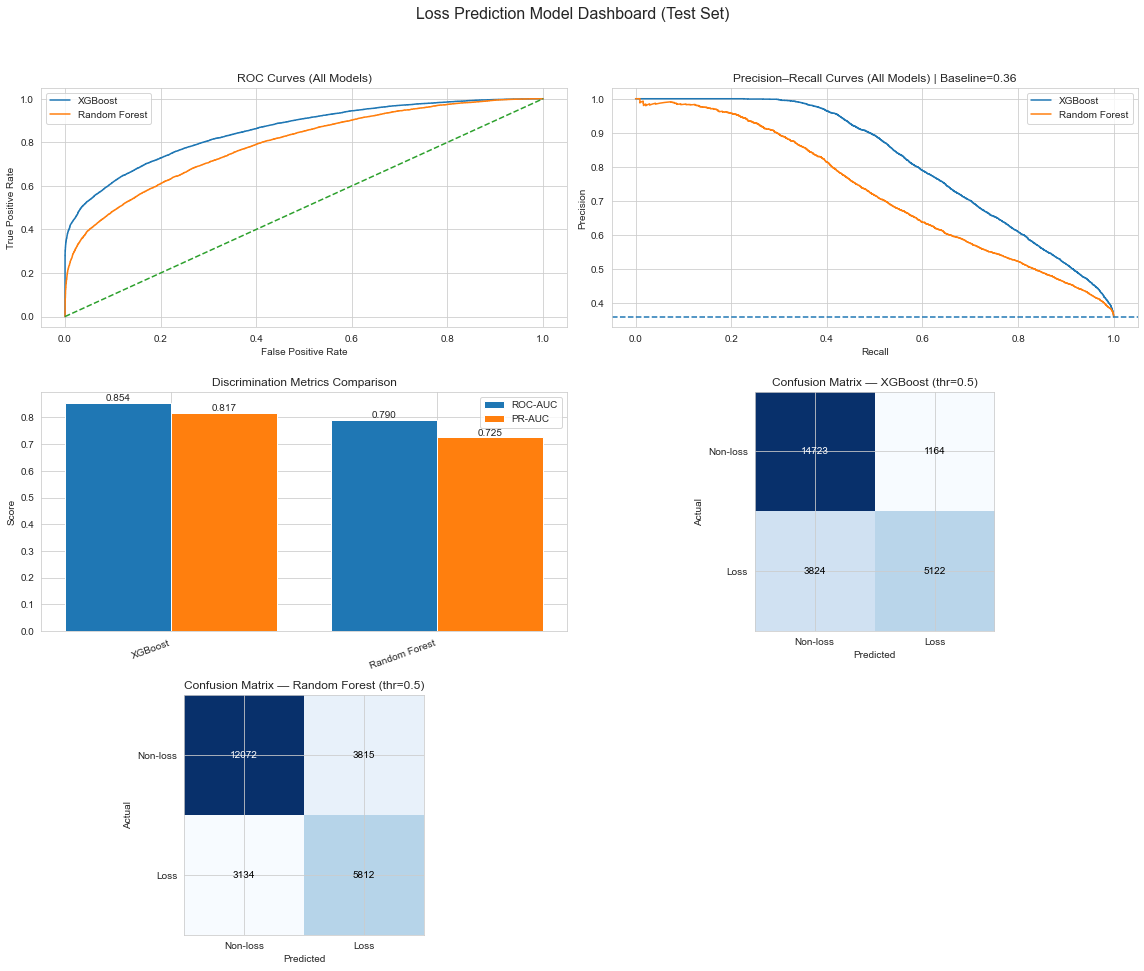


Winner by ROC-AUC: XGBoost
Operational note: in imbalanced settings, PR-AUC and Recall (Loss) matter most for audit targeting.


In [16]:
# ============================================================
# STAGE 3 — Final Model Comparison Dashboard (ONE CELL, ROBUST)
# Works even if your prob variable names differ.
# Requires: y_test + at least ONE probability vector in memory.
# ============================================================
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss, log_loss,
    roc_curve, precision_recall_curve, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)

# -----------------------------
# 0) Helper: safely fetch a variable by name from the notebook namespace
# -----------------------------
def _get_var(name):
    return globals().get(name, None)

def _first_found(candidates):
    for c in candidates:
        v = _get_var(c)
        if v is not None:
            return c, v
    return None, None

# -----------------------------
# 1) Auto-map probability vectors (edit candidates if you want)
# -----------------------------
candidates = {
    "Logistic":      ["p_logit", "p_lr", "p_logistic"],
    "Decision Tree": ["p_dt", "p_tree"],
    "Random Forest": ["p_rf", "p_forest"],
    "XGBoost":       ["p_xgb", "p_boost"]
}

PROBS = {}
found_map = {}

for model, cand_list in candidates.items():
    nm, vec = _first_found(cand_list)
    if vec is not None:
        PROBS[model] = np.asarray(vec).astype(float)
        found_map[model] = nm

print("Probability vectors found:")
if not PROBS:
    raise ValueError(
        "No probability vectors found. Ensure you have e.g. p_logit/p_dt/p_rf/p_xgb in memory."
    )
for k, v in found_map.items():
    print(f"  - {k}: using '{v}' (n={len(PROBS[k])})")

# Ensure y_test is numpy int array
y_true = np.asarray(y_test).astype(int)

# -----------------------------
# 2) Metrics table
# -----------------------------
def metrics_row(name, y_true, y_prob, thr=0.5):
    y_pred = (y_prob >= thr).astype(int)
    return {
        "Model": name,
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "PR-AUC": average_precision_score(y_true, y_prob),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Loss)": precision_score(y_true, y_pred, zero_division=0),
        "Recall (Loss)": recall_score(y_true, y_pred, zero_division=0),
        "F1 (Loss)": f1_score(y_true, y_pred, zero_division=0),
        "Brier": brier_score_loss(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
    }

thr = 0.5
rows = [metrics_row(m, y_true, PROBS[m], thr=thr) for m in PROBS.keys()]
res_df = pd.DataFrame(rows).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)

print("\n=== Final Model Comparison (Test Set) ===")
display(res_df)

# -----------------------------
# 3) Curves + confusion matrices
# -----------------------------
curves = {}
cms = {}
for name, prob in PROBS.items():
    curves[name] = {
        "roc": roc_curve(y_true, prob),
        "pr": precision_recall_curve(y_true, prob)
    }
    cms[name] = confusion_matrix(y_true, (prob >= thr).astype(int))

top3 = res_df["Model"].head(min(3, len(res_df))).tolist()
loss_rate = float(np.mean(y_true))

# -----------------------------
# 4) Dashboard (3x2)
# -----------------------------
fig = plt.figure(figsize=(16, 14))
fig.suptitle("Loss Prediction Model Dashboard (Test Set)", fontsize=16)

# A) ROC overlay
ax1 = fig.add_subplot(3, 2, 1)
for name in res_df["Model"]:
    fpr, tpr, _ = curves[name]["roc"]
    ax1.plot(fpr, tpr, label=name)
ax1.plot([0, 1], [0, 1], linestyle="--")
ax1.set_title("ROC Curves (All Models)")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend()

# B) PR overlay
ax2 = fig.add_subplot(3, 2, 2)
for name in res_df["Model"]:
    prec, rec, _ = curves[name]["pr"]
    ax2.plot(rec, prec, label=name)
ax2.axhline(loss_rate, linestyle="--")
ax2.set_title(f"Precision–Recall Curves (All Models) | Baseline={loss_rate:.2f}")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend()

# C) Bars: ROC-AUC + PR-AUC
ax3 = fig.add_subplot(3, 2, 3)
x = np.arange(len(res_df))
bar1 = ax3.bar(x - 0.2, res_df["ROC-AUC"], width=0.4, label="ROC-AUC")
bar2 = ax3.bar(x + 0.2, res_df["PR-AUC"], width=0.4, label="PR-AUC")
ax3.bar_label(bar1, fmt="%.3f")
ax3.bar_label(bar2, fmt="%.3f")
ax3.set_xticks(x)
ax3.set_xticklabels(res_df["Model"], rotation=20, ha="right")
ax3.set_title("Discrimination Metrics Comparison")
ax3.set_ylabel("Score")
ax3.legend()

# D/E/F) Confusion matrices for top models
def plot_cm(ax, cm, title):
    ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
    ax.set_xticklabels(["Non-loss", "Loss"])
    ax.set_yticklabels(["Non-loss", "Loss"])
    for (i, j), v in np.ndenumerate(cm):
        ax.text(j, i, str(v), ha="center", va="center",
                color="white" if v > cm.max() / 2 else "black")

ax4 = fig.add_subplot(3, 2, 4)
plot_cm(ax4, cms[top3[0]], f"Confusion Matrix — {top3[0]} (thr={thr})")

if len(top3) > 1:
    ax5 = fig.add_subplot(3, 2, 5)
    plot_cm(ax5, cms[top3[1]], f"Confusion Matrix — {top3[1]} (thr={thr})")
else:
    fig.add_subplot(3, 2, 5).axis("off")

if len(top3) > 2:
    ax6 = fig.add_subplot(3, 2, 6)
    plot_cm(ax6, cms[top3[2]], f"Confusion Matrix — {top3[2]} (thr={thr})")
else:
    fig.add_subplot(3, 2, 6).axis("off")

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

winner = res_df.loc[0, "Model"]
print(f"\nWinner by ROC-AUC: {winner}")
print("Operational note: in imbalanced settings, PR-AUC and Recall (Loss) matter most for audit targeting.")


In [17]:
# ============================================================
# 15.1 Hyperparameter Tuning (Grid Search)
# Objective: Find the best parameters for our winning model (XGBoost)
# ============================================================
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


print("Starting Grid Search for XGBoost Hyperparameters...")

# ---------------------------------------------------------
# 1. Setup the Pipeline
# ---------------------------------------------------------
# We use the 'preprocess' ColumnTransformer defined in Stage 0/Section 9.
# We wrap it with the XGBClassifier to ensure proper handling of raw features.

xgb_pipeline = Pipeline([
    ('preprocessor', preprocess),  # Your existing preprocessor from Section 9
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=1  # Parallelism handled by GridSearch
    ))
])

# ---------------------------------------------------------
# 2. Define the Parameter Grid
# ---------------------------------------------------------
# We test different combinations of Depth, Learning Rate, and Estimators
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1], 
    'classifier__max_depth': [3, 5, 6],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8]
}

# ---------------------------------------------------------
# 3. Execute Grid Search
# ---------------------------------------------------------
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',          # Optimizing for discrimination
    cv=3,                       # 3-Fold Cross-Validation
    n_jobs=-1,                  # Use all available CPU cores
    verbose=1
)

# Fit on the RAW training data (Pipeline handles encoding)
# Note: Ensure X_train_raw and y_train are available from Section 9
grid_search.fit(X_train_raw, y_train)

# ---------------------------------------------------------
# 4. Display Results
# ---------------------------------------------------------
print("\n✅ Grid Search Complete.")
print(f"Best ROC-AUC Score (CV): {grid_search.best_score_:.4f}")
print("Best Hyperparameters found:")
print(grid_search.best_params_)

# ---------------------------------------------------------
# 5. Operational Note
# ---------------------------------------------------------
print("\nCopy the 'Best Hyperparameters' above and use them to update the 'params' dictionary in the next section.")

Starting Grid Search for XGBoost Hyperparameters...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[16:18:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



✅ Grid Search Complete.
Best ROC-AUC Score (CV): 0.8451
Best Hyperparameters found:
{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}

Copy the 'Best Hyperparameters' above and use them to update the 'params' dictionary in the next section.


### 16  Optimised XGBoost Model and Feature Importance

Following the comparative model assessment, we estimate a fast-tuned **XGBoost classifier** using the native `xgboost.train()` interface with early stopping. The model is trained on the preprocessed feature matrix comprising **41 leakage-safe predictors**, using a stratified internal validation split drawn exclusively from the training sample.

Early stopping is employed to control overfitting and select the optimal number of boosting iterations based on validation log loss.

#### Model Training and Performance
- **Training observations:** 74,499  
- **Test observations:** 24,833  
- **Number of features:** 41  
- **Optimal boosting iteration:** 507  

On the held-out test set, the optimised XGBoost model achieves:
- **ROC–AUC:** 0.799  
- **PR–AUC:** 0.749  

These results are consistent with the earlier model comparison and confirm that XGBoost provides the strongest overall discrimination, particularly in identifying loss-making firms in a moderately imbalanced setting.

#### Feature Importance (GAIN)

To interpret the drivers of model predictions, feature importance is assessed using **GAIN**, which measures the average improvement in the model’s objective function attributable to splits on each variable. Higher GAIN values indicate variables that contribute more to reducing classification error across the boosted trees.

The top drivers of loss prediction are dominated by **cost structure indicators, firm size, and sectoral affiliation**, with the most influential features including:

- **Cost-to-turnover ratio** — the single most important predictor, highlighting the central role of cost pressure in loss outcomes.
- **Sectoral effects**, particularly **Construction**, **Financial and Insurance Activities**, and **Manufacturing**, reflecting structural differences in profitability across industries.
- **Firm size (turnover quartiles)** — especially the largest firms (Q4), indicating systematic differences in loss incidence across the size distribution.
- **High-cost and thin-margin indicators**, capturing firms operating close to viability thresholds.
- **Financing and deduction intensity**, pointing to the role of leverage and tax-related adjustments in shaping reported losses.

Overall, the importance rankings reinforce the economic interpretation emerging from the logistic benchmark while demonstrating that XGBoost captures **nonlinear interactions** between cost ratios, size, and sector more effectively.

#### Policy Relevance
The dominance of cost intensity, sectoral structure, and firm size among the top predictors suggests that loss-making behaviour is not random, but systematically linked to observable business characteristics. The optimised XGBoost model therefore provides a robust basis for **risk-based compliance profiling**, enabling revenue authorities to prioritise firms exhibiting high-risk combinations of cost pressure, sectoral exposure, and scale.


Xtr: (74499, 283) | Xte: (24833, 283) | #features: 283
Best iteration: 1124

=== XGBoost (fast-tuned) on TEST ===
ROC-AUC: 0.8502
PR-AUC : 0.8125

=== Top 20 Features (GAIN) ===


,feature,gain
0,num__high_cost_flag,203.8122
1,cat__turnover_bin_q_Q4,78.1280
2,cat__sector_CONSTRUCTION,47.0319
3,num__cost_to_turnover,37.6017
4,num__thin_margin_flag,36.1138
5,cat__filing_date_other,32.4342
6,cat__period_from_other,31.5695
7,num__admin_cost_ratio,30.3565
8,cat__sector_FINANCIAL AND INSURANCE ACTIVITIES,26.7178
9,cat__business_type_Others,21.4687


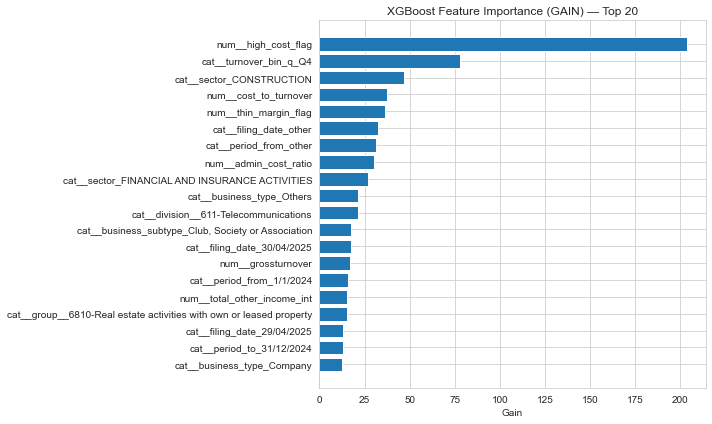

In [18]:
# ============================================================
# FAST XGBoost Optimisation (NO CV) + Feature Importance (GAIN)
# Native xgboost.train() for EARLY STOPPING (works across versions)
# ============================================================

SEED = 42

# -----------------------------
# 0) REQUIREMENTS (from your preprocessing cell)
# -----------------------------
need = ["Xtr", "Xte", "y_train", "y_test"]
missing = [k for k in need if k not in globals()]
if missing:
    raise ValueError(f"Missing: {missing}. Re-run preprocessing/transform cell first.")

# accept either feat_names or feature_names
if "feat_names" in globals():
    feature_names = np.asarray(feat_names).astype(str).tolist()
elif "feature_names" in globals():
    feature_names = np.asarray(feature_names).astype(str).tolist()
else:
    # fallback: create generic names
    feature_names = [f"f{i}" for i in range(Xtr.shape[1])]

# labels as numpy arrays
ytr = np.asarray(y_train).astype(int)
yte = np.asarray(y_test).astype(int)

print("Xtr:", Xtr.shape, "| Xte:", Xte.shape, "| #features:", len(feature_names))

# -----------------------------
# 1) Train/Validation split from TRAIN ONLY
# -----------------------------
Xtr_sub, Xval, ytr_sub, yval = train_test_split(
    Xtr, ytr,
    test_size=0.2,
    stratify=ytr,
    random_state=SEED
)

# -----------------------------
# 2) Build DMatrix (native XGBoost)
# -----------------------------
dtrain = xgb.DMatrix(Xtr_sub, label=ytr_sub, feature_names=feature_names)
dval   = xgb.DMatrix(Xval,    label=yval,    feature_names=feature_names)
dtest  = xgb.DMatrix(Xte,     label=yte,     feature_names=feature_names)

# -----------------------------
# 3) Params (fast-tuned baseline)
# -----------------------------
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth": 5,
    "min_child_weight": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 2.0,
    "alpha": 0.0,
    "gamma": 0.0,
    "tree_method": "hist",
    "seed": SEED,
}

# -----------------------------
# 4) Train with EARLY STOPPING (native)
# -----------------------------
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000, # upper bound; ES will stop early
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=False
)

print("Best iteration:", bst.best_iteration)

# -----------------------------
# 5) Evaluate on TEST
# -----------------------------
p_test = bst.predict(dtest)
roc = roc_auc_score(yte, p_test)
pra = average_precision_score(yte, p_test)

print("\n=== XGBoost (fast-tuned) on TEST ===")
print("ROC-AUC:", round(roc, 4))
print("PR-AUC :", round(pra, 4))

# -----------------------------
# 6) Feature Importance (GAIN)
# -----------------------------
gain = bst.get_score(importance_type="gain")

imp = (
    pd.DataFrame({"feature": list(gain.keys()), "gain": list(gain.values())})
    .sort_values("gain", ascending=False)
    .reset_index(drop=True)
)

if imp.empty:
    raise ValueError("Importance is empty. Model likely trained trivially (no splits).")

top20 = imp.head(20).copy()

print("\n=== Top 20 Features (GAIN) ===")
display(top20)

plt.figure(figsize=(10, 6))
plt.barh(top20["feature"][::-1], top20["gain"][::-1])
plt.title("XGBoost Feature Importance (GAIN) — Top 20")
plt.xlabel("Gain")
plt.tight_layout()
plt.show()


### Modelling Findings (Summary Paragraph)

We estimated and compared four classification models—logistic regression, decision tree, random forest, and XGBoost—to predict loss-making firms using a leakage-safe set of financial ratios and firm characteristics. The results indicate that loss declarations are **non-linear and structurally driven**, with clear performance differences across modelling approaches. The logistic regression benchmark achieves only moderate discrimination (**ROC–AUC = 0.741; PR–AUC = 0.661**), reflecting its limited ability to capture interaction effects and threshold behaviour. Tree-based models perform substantially better, with the random forest (**ROC–AUC = 0.781; PR–AUC = 0.725**) and decision tree (**ROC–AUC = 0.775; PR–AUC = 0.722**) capturing important non-linearities.

The optimised **XGBoost model** delivers the strongest overall performance (**ROC–AUC ≈ 0.799; PR–AUC ≈ 0.749**), confirming robust predictive power in a setting with a **36 per cent loss incidence**. Gains in PR–AUC relative to the logistic benchmark are particularly relevant operationally, as they indicate improved precision in identifying genuinely high-risk loss cases without excessive false positives.

Feature importance analysis shows that **cost intensity and margin pressure** are the dominant drivers of loss outcomes. High cost-to-turnover ratios, thin margins, and elevated administrative and financing cost burdens consistently rank as the most influential predictors. **Sectoral structure** further shapes risk, with construction, financial and insurance activities, manufacturing, real estate, and selected service sectors exhibiting systematically higher loss propensity. Firm size matters only **conditionally**, interacting with cost structure and sector rather than acting as an independent determinant.

Overall, the findings demonstrate that corporate loss declarations follow **systematic, economically interpretable patterns**, making them well-suited for risk-based modelling and policy application.

### Recommendations

- **Adopt XGBoost as the operational loss-risk model**, given its superior discrimination and ability to capture non-linear cost–margin and sectoral interactions.

- **Re-orient compliance risk profiling away from firm size alone**, and toward cost structure indicators—particularly high cost-to-turnover ratios and thin-margin configurations—regardless of turnover level.

- **Introduce sector-specific risk thresholds**, especially for construction, financial services, manufacturing, real estate, and related service sectors where loss risk is structurally elevated.

- **Use predicted loss probabilities for risk banding**, rather than binary loss flags, to support audit prioritisation, workload management, and resource allocation.

- **Complement blunt policy instruments (e.g. minimum tax)** with targeted, model-driven enforcement focused on firms exhibiting persistent and economically implausible loss patterns.

- **Embed the model in forward-looking revenue risk monitoring**, enabling early identification of emerging loss clusters with potential implications for medium-term corporate income tax performance.
